In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
sns.set_style('whitegrid')
%matplotlib inline

In [80]:
trainData= pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')
testData=pd.read_csv('./data/house-prices-advanced-regression-techniques/test.csv')

In [81]:
def dropFloatCol(df):
    dropNumCol=[]
    for checkZeros in list(df.select_dtypes(exclude=['category', object]).columns)[:-1]:
        #convert nan to 0.0
        df[checkZeros].replace(np.nan,0.0, inplace=True)
        if len(df[checkZeros][df[checkZeros]==0.0])/len(df) >= .90:
            dropNumCol.append(checkZeros)
    if len(dropNumCol)>0:
        df.drop(dropNumCol, axis=1, inplace=True)
    return df,dropNumCol

In [82]:
trainData,dropNumColumns=dropFloatCol(trainData)

In [83]:
dropNumColumns

['LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [84]:
testData.drop(dropNumColumns, axis=1, inplace=True)

In [85]:
for checkZerosTest in list(testData.select_dtypes(exclude=['category', object]).columns)[:-1]:
    testData[checkZerosTest].replace(np.nan,0.0, inplace=True)

In [86]:
def convertCatToNum(df):
    cat_map_dict={}
    for cat in list(df.select_dtypes(include=['category', object]).columns):
        #convert nan to None
        df[cat].replace(np.nan,'None', inplace=True)
        catUnq=list(map(str,list(df[cat].unique())))
        noneStatus=[l for l in catUnq if l.lower()=='none']
        addnone=1
        if len(noneStatus)>0:
            addnone=0
            for n in noneStatus:
                del catUnq[catUnq.index(n)]
            catUnq.insert(0,'None')
        cat_map_dict[cat]={d:i+addnone for i,d in enumerate(catUnq)}
    return cat_map_dict

In [87]:
def dropCatCol(df):
    mappedCatDic=convertCatToNum(df)
    dropCatCol=[]
    for catcount in mappedCatDic:
        df[catcount] = df[catcount].map(mappedCatDic[catcount])
        if (len(df[catcount][df[catcount]==0])/len(df)) >= .90:
            dropCatCol.append(catcount)
    
    if len(dropCatCol)>0:
        df.drop(dropCatCol, axis=1, inplace=True)
    return df,mappedCatDic,dropCatCol

In [88]:
trainData,catMapDic,dropCatColumns=dropCatCol(trainData)

In [89]:
trainData['Foundation']

0       1
1       2
2       1
3       3
4       1
5       4
6       1
7       2
8       3
9       3
10      2
11      1
12      2
13      1
14      2
15      3
16      2
17      5
18      1
19      2
20      1
21      1
22      1
23      1
24      2
25      1
26      2
27      1
28      2
29      3
       ..
1430    1
1431    2
1432    3
1433    1
1434    2
1435    2
1436    1
1437    1
1438    2
1439    2
1440    3
1441    1
1442    1
1443    3
1444    1
1445    2
1446    2
1447    1
1448    2
1449    2
1450    2
1451    1
1452    1
1453    1
1454    1
1455    1
1456    2
1457    6
1458    2
1459    2
Name: Foundation, Length: 1460, dtype: int64

In [90]:
for testCatCol in catMapDic:
    try:
        testData[testCatCol].replace(np.nan,'None', inplace=True)
        testData[testCatCol] = testData[testCatCol].map(catMapDic[testCatCol])
    except KeyError:
        pass

In [91]:
testData.drop(dropCatColumns, axis=1, inplace=True)

In [92]:
trainData.drop(['Id'], axis=1, inplace=True)
testData.drop(['Id'], axis=1, inplace=True)

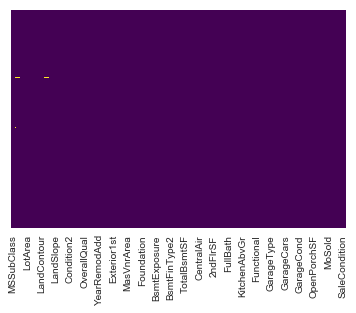

In [115]:
#cbar false means no color bar and yticklabels false means no y label and check null value in yellow if present
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
##replace Nan value to 0.0 in test Data
for testCol in testData.columns:
    testData[testCol].replace(np.nan,0.0, inplace=True)

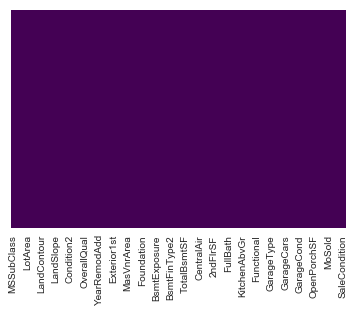

In [117]:
#cbar false means no color bar and yticklabels false means no y label and check null value in yellow if present
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [118]:
trainData.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'

In [119]:
train_features=trainData[trainData.columns[:-1]]
test_features=testData
train_target=trainData[trainData.columns[-1]]
#test_target=

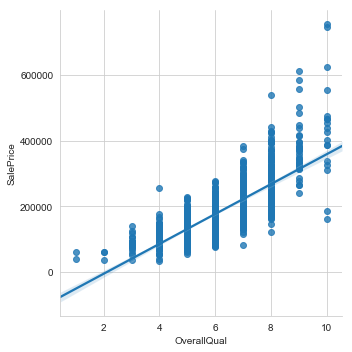

In [120]:
sns.lmplot(x='OverallQual',y='SalePrice',data=trainData,palette='coolwarm')

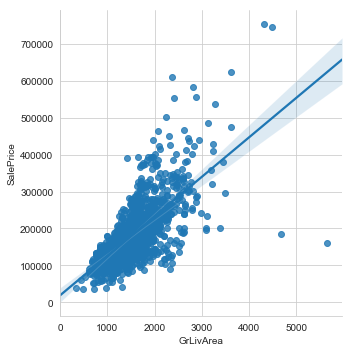

In [121]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=trainData,palette='coolwarm')

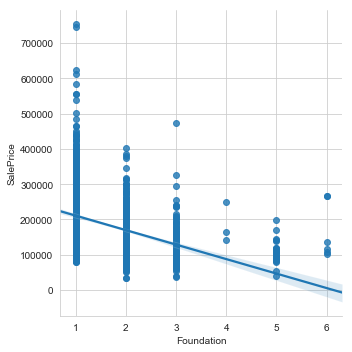

In [122]:
sns.lmplot(x='Foundation',y='SalePrice',data=trainData,palette='coolwarm')

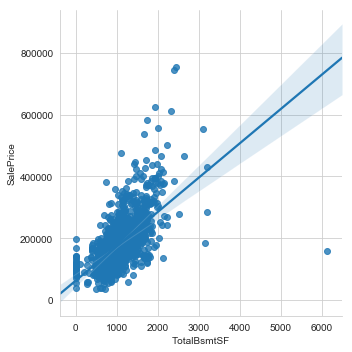

In [123]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=trainData,palette='coolwarm')

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [125]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state=101)

In [126]:
lm_train = LinearRegression()

In [127]:
lm_train.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
print(lm_train.intercept_)

-436755.8993656252


In [129]:
coeff_df_train = pd.DataFrame(lm_train.coef_,train_features.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False)
coeff_df_train

,Coefficient
OverallQual,13418.652133
CentralAir,9777.025343
KitchenQual,9178.176018
GarageCars,7340.498777
OverallCond,6250.008992
BsmtQual,6109.922265
LotShape,4729.474903
TotRmsAbvGrd,3863.936938
LandSlope,3650.675057
ExterCond,3625.228783


In [130]:
predictions_train = lm_train.predict(X_test)

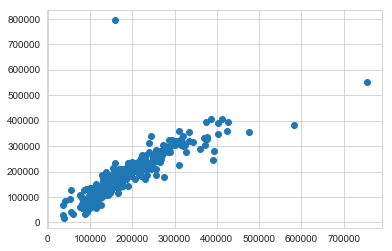

In [131]:
plt.scatter(y_test,predictions_train)

In [132]:
np.corrcoef(y_test,predictions_train)

array([[1.        , 0.85834558],
       [0.85834558, 1.        ]])

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_train))
print('MSE:', metrics.mean_squared_error(y_test, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_train)))
print('R-Squared',r2_score(y_test, predictions_train))

MAE: 20915.14812685029
MSE: 1781768232.1169007
RMSE: 42210.996578106286
R-Squared 0.7168575248179097


In [134]:
lm = LinearRegression()

In [135]:
lm.fit(train_features,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
print(lm.intercept_)

-674122.0942811524


In [137]:
coeff_df = pd.DataFrame(lm.coef_,train_features.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False)
coeff_df

,Coefficient
OverallQual,14878.758227
GarageCars,14631.676396
KitchenQual,8260.352060
LandSlope,8218.093656
BsmtFullBath,7989.747411
BsmtQual,7327.626764
RoofStyle,7225.062982
FullBath,7223.568800
GarageQual,6547.842383
OverallCond,5791.568540


In [138]:
predictions = lm.predict(test_features)

In [141]:
predictionsDF=test_features
predictionsDF["Predicted Sales price"]=predictions

In [142]:
predictionsDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Predicted Sales price
0,20,5.0,80.0,11622,1,1,1,1.0,1,1,...,1,140,0,0,1,6,2010,1.0,1,95490.447324
1,20,1.0,81.0,14267,1,2,1,1.0,3,1,...,1,393,36,0,0,6,2010,1.0,1,158279.143035
2,60,1.0,74.0,13830,1,2,1,1.0,1,1,...,1,212,34,0,1,3,2010,1.0,1,179237.610332
3,60,1.0,78.0,9978,1,2,1,1.0,1,1,...,1,360,36,0,0,6,2010,1.0,1,204914.070839
4,120,1.0,43.0,5005,1,2,4,1.0,1,1,...,1,0,82,0,0,1,2010,1.0,1,181100.827882


In [143]:
predictionsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
MSSubClass               1459 non-null int64
MSZoning                 1459 non-null float64
LotFrontage              1459 non-null float64
LotArea                  1459 non-null int64
Street                   1459 non-null int64
LotShape                 1459 non-null int64
LandContour              1459 non-null int64
Utilities                1459 non-null float64
LotConfig                1459 non-null int64
LandSlope                1459 non-null int64
Neighborhood             1459 non-null int64
Condition1               1459 non-null int64
Condition2               1459 non-null int64
BldgType                 1459 non-null int64
HouseStyle               1459 non-null int64
OverallQual              1459 non-null int64
OverallCond              1459 non-null int64
YearBuilt                1459 non-null int64
YearRemodAdd             1459 non-null int64
RoofStyle                1459 no